In [ ]:
import kagglehub
cat_skin_diseases_image_dataset_path = kagglehub.dataset_download('vekified/cat-skin-disease-v3')

print('Data source import complete.')

Data source import complete.


Using device: cuda
Classes: ['Flea_Allergy', 'Health', 'Ringworm', 'Scabies']
Training samples: 699
Validation samples: 199
Test samples: 101


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 180MB/s]


Starting training process...

Epoch 1/25
----------
train Loss: 1.2637 Acc: 0.4864
valid Loss: 1.0790 Acc: 0.7136
Model saved with accuracy: 0.7136

Epoch 2/25
----------
train Loss: 0.9691 Acc: 0.7382
valid Loss: 0.7435 Acc: 0.7940
Model saved with accuracy: 0.7940

Epoch 3/25
----------
train Loss: 0.7453 Acc: 0.7525
valid Loss: 0.5857 Acc: 0.8241
Model saved with accuracy: 0.8241

Epoch 4/25
----------
train Loss: 0.6448 Acc: 0.7811
valid Loss: 0.4768 Acc: 0.8744
Model saved with accuracy: 0.8744

Epoch 5/25
----------
train Loss: 0.5549 Acc: 0.8054
valid Loss: 0.4116 Acc: 0.8593

Epoch 6/25
----------
train Loss: 0.5022 Acc: 0.8255
valid Loss: 0.3484 Acc: 0.8844
Model saved with accuracy: 0.8844

Epoch 7/25
----------
train Loss: 0.4429 Acc: 0.8455
valid Loss: 0.3147 Acc: 0.9095
Model saved with accuracy: 0.9095

Epoch 8/25
----------
train Loss: 0.4229 Acc: 0.8541
valid Loss: 0.2995 Acc: 0.9095

Epoch 9/25
----------
train Loss: 0.4413 Acc: 0.8555
valid Loss: 0.2980 Acc: 0.9045

E

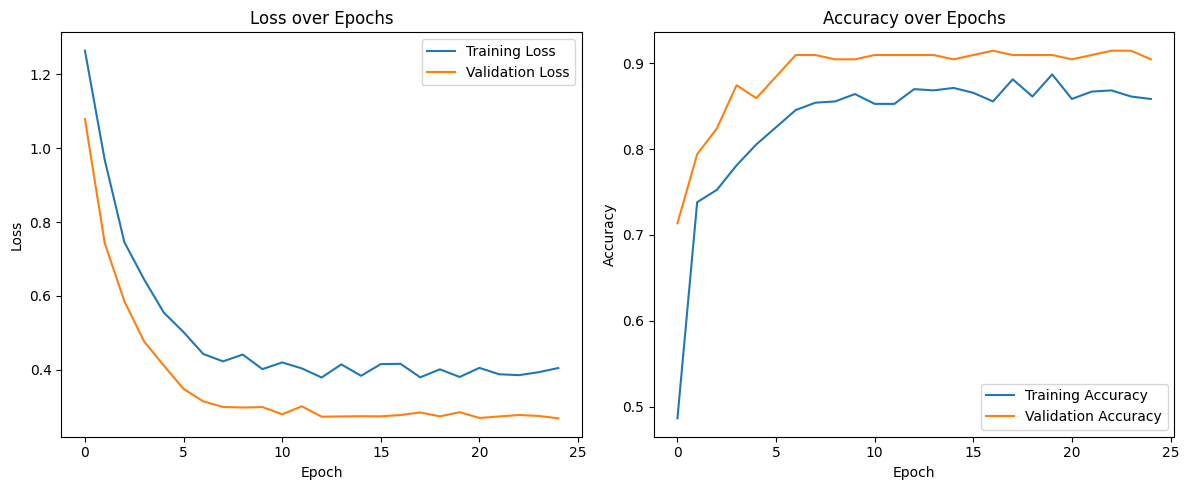

Loaded best model from epoch 16 with validation accuracy: 0.9146

Evaluating on test set...
Overall Accuracy: 0.8911
Classification Report:
              precision    recall  f1-score   support

Flea_Allergy       0.92      0.92      0.92        25
      Health       0.77      0.96      0.86        25
    Ringworm       0.91      0.77      0.83        26
     Scabies       1.00      0.92      0.96        25

    accuracy                           0.89       101
   macro avg       0.90      0.89      0.89       101
weighted avg       0.90      0.89      0.89       101

Per-class metrics:
Flea_Allergy:
Precision: 0.9200
Recall: 0.9200
Specificity: 0.9737
F1-score: 0.9200
----------
Health:
Precision: 0.7742
Recall: 0.9600
Specificity: 0.9079
F1-score: 0.8571
----------
Ringworm:
Precision: 0.9091
Recall: 0.7692
Specificity: 0.9733
F1-score: 0.8333
----------
Scabies:
Precision: 1.0000
Recall: 0.9200
Specificity: 1.0000
F1-score: 0.9583
----------


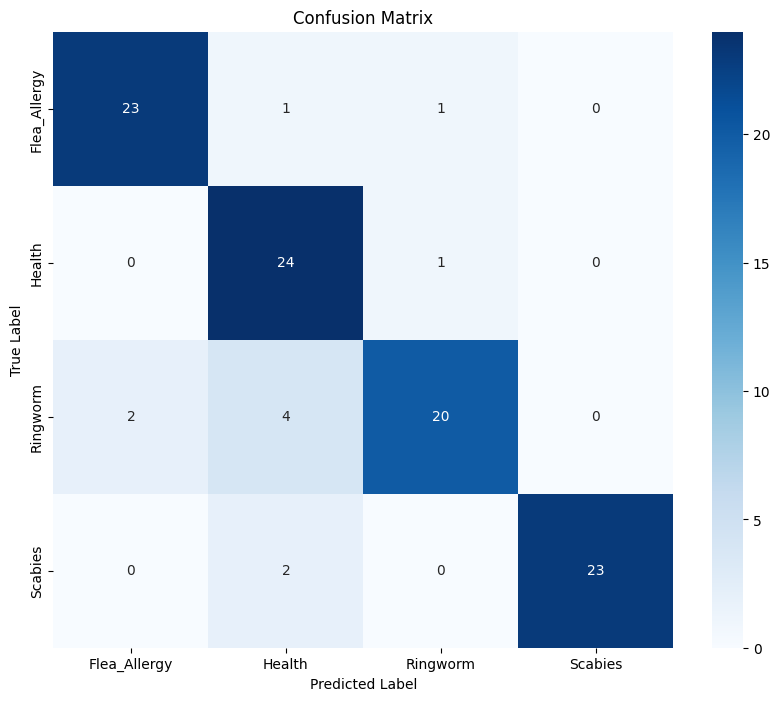


Training complete!
Best validation accuracy: 0.9146
Test accuracy: 0.8911

To use this model for inference on new cat skin images:

    # Load the trained model
    model = models.resnet50(weights=None)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 4)  # 4 classes for cat skin diseases
    
    # Load saved weights
    checkpoint = torch.load('cat_skin_disease_model.pth')
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    # Make predictions on new images
    # ... your inference code here ...
    


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


data_dir = '/kaggle/input/cat-skin-disease-v3/cat_skin_disease_split'
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'valid', 'test']
}

dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=4)
    for x in ['train', 'valid', 'test']
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}
class_names = image_datasets['train'].classes
num_classes = len(class_names)

print(f"Classes: {class_names}")
print(f"Training samples: {dataset_sizes['train']}")
print(f"Validation samples: {dataset_sizes['valid']}")
print(f"Test samples: {dataset_sizes['test']}")

model = models.resnet50(weights='ResNet50_Weights.DEFAULT')
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    best_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'valid_loss': [], 'valid_acc': []}

    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train' and scheduler is not None:
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['valid_loss'].append(epoch_loss)
                history['valid_acc'].append(epoch_acc.item())

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'accuracy': best_acc,
                }, 'cat_skin_disease_model.pth')
                print(f'Model saved with accuracy: {best_acc:.4f}')

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['valid_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['valid_acc'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

    return model, history

def evaluate_model(model, dataset='test'):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloaders[dataset]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=class_names)

    tn = np.zeros(num_classes)
    fp = np.zeros(num_classes)
    tp = np.zeros(num_classes)
    fn = np.zeros(num_classes)

    for i in range(num_classes):
        tp[i] = cm[i, i]
        fn[i] = np.sum(cm[i, :]) - tp[i]
        fp[i] = np.sum(cm[:, i]) - tp[i]
        tn[i] = np.sum(cm) - tp[i] - fp[i] - fn[i]

    accuracy = np.sum(tp) / np.sum(cm)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = 2 * (precision * recall) / (precision + recall)

    precision = np.nan_to_num(precision)
    recall = np.nan_to_num(recall)
    specificity = np.nan_to_num(specificity)
    f1 = np.nan_to_num(f1)

    print(f'Overall Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(report)

    print('Per-class metrics:')
    for i, class_name in enumerate(class_names):
        print(f'{class_name}:')
        print(f'Precision: {precision[i]:.4f}')
        print(f'Recall: {recall[i]:.4f}')
        print(f'Specificity: {specificity[i]:.4f}')
        print(f'F1-score: {f1[i]:.4f}')
        print('-' * 10)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix.png')
    plt.show()

    return accuracy, precision, recall, f1

if __name__ == '__main__':
    print("Starting training process...")

    model, history = train_model(model, criterion, optimizer, scheduler, num_epochs=25)

    checkpoint = torch.load('cat_skin_disease_model.pth')
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Loaded best model from epoch {checkpoint['epoch']} with validation accuracy: {checkpoint['accuracy']:.4f}")

    print("\nEvaluating on test set...")
    accuracy, precision, recall, f1 = evaluate_model(model)

    print("\nTraining complete!")
    print(f"Best validation accuracy: {checkpoint['accuracy']:.4f}")
    print(f"Test accuracy: {accuracy:.4f}")

    print("\nTo use this model for inference on new cat skin images:")